# 1.0. Imports

In [3]:
import numpy as np
import pymc3 as pm

# 2.0. Dados

In [4]:
# Dados Xiomi
X_a = np.array( [1]* ( int(0.83 * 201) + int(0.09 * 201) ) + [0]* ( int(0.01 * 201) + int(0.03 * 201) ))
np.random.shuffle( X_a )

# Dados Motorola
X_b = np.array( [1]* ( int(0.78 * 301) + int(0.15 * 301) ) + [0]* ( int(0.02 * 301) + int(0.03 * 301) ))
np.random.shuffle( X_b )

In [6]:
X_b

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

# 3.0. Inferencia Bayesiana

In [11]:
with pm.Model() as model:
    # prior
    p_a = pm.Beta( 'p_a', 1, 1)
    p_b = pm.Beta( 'p_b', 5, 3)

    # posterior
    obs_a = pm.Bernoulli( 'obs_a', p_a, observed = X_a )
    obs_b = pm.Bernoulli( 'obs_b', p_b, observed = X_b )

    #likelihood
    trace = pm.sample( draws=2000, tune=1000, step=pm.Metropolis() )


<ipython-input-11-8b6278fc1f9d>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample( draws=2000, tune=1000, step=pm.Metropolis() )
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_b]
>Metropolis: [p_a]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 34 seconds.
The number of effective samples is smaller than 25% for some parameters.


# 4.0. Plot Posterior

c:\users\santo\appdata\local\programs\python\python39\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'p_a'}>,
       <AxesSubplot:title={'center':'p_b'}>], dtype=object)

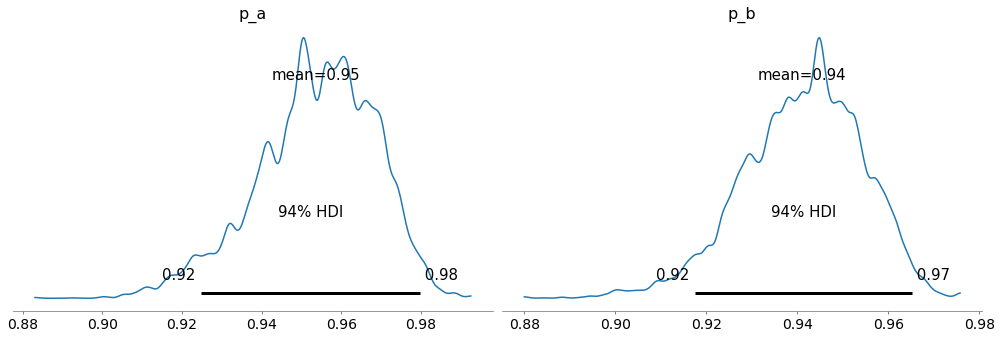

In [12]:
pm.plot_posterior( trace )